### HR - Attrition Analytics -  Exploratory Analysis & Predictive Modeling
> Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire <br>
> and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources.  <br>
> So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition  <br>
> risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the  <br>
> impact to the orgranization.

### DATA ATRRIBUTES

satisfaction_level: Employee satisfaction level <br>
last_evaluation: Last evaluation  <br>
number_project: Number of projects  <br>
average_montly_hours: Average monthly hours <br>
time_spend_company: Time spent at the company <br>
Work_accident: Whether they have had a work accident <br>
promotion_last_5years: Whether they have had a promotion in the last 5 years <br>
department: Department <br>
salary: Salary <br>
left: Whether the employee has left <br>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
hr_df = pd.read_csv( 'HR_comma_sep.csv' )

In [44]:
hr_df.columns

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'department', u'salary'],
      dtype='object')

In [12]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#missings
hr_df.isnull().any().sum()

0

In [7]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


The summary statistics for Work_accident, left and promotion_last_5years does not make sense, as they are categorical variables

### EXPLORATORY ANALYSIS

In [8]:
# 0. How many records of people leaving the company exist in the dataset?
hr_left_df = pd.DataFrame( hr_df.left.value_counts() )
hr_left_df

,left
0,11428
1,3571


In [9]:
#1. What is the percentage of churn by salary bucket

In [10]:
salary_count = hr_df[['salary', 'left']].groupby(['salary', 'left']).size().reset_index()
salary_count.columns = ['salary', 'left', 'count']

In [11]:
salary_count

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


In [12]:
salary_count = hr_df[['salary', 'left']].groupby(['salary', 'left']).size()
salary_percent = salary_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In [13]:
salary_percent

,salary,left,0
0,high,0,0.933711
1,high,1,0.066289
2,low,0,0.703116
3,low,1,0.296884
4,medium,0,0.795687
5,medium,1,0.204313


In [14]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

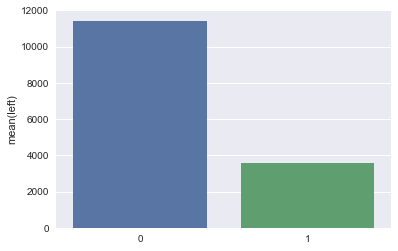

In [15]:
sn.barplot( hr_left_df.index, hr_left_df.left )

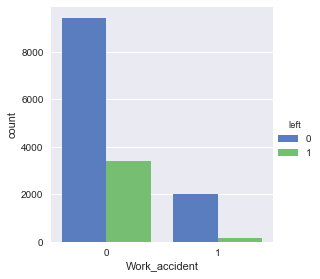

In [16]:
# 2. How many people, who had work accidents, actually left the company?
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size().reset_index()
work_accident_count.columns = ['Work_accident', 'left', 'count']

sn.factorplot(x="Work_accident", y = 'count', hue="left", data=work_accident_count,
               size=4, kind="bar", palette="muted")


In [17]:
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size()
work_accident_percent = work_accident_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In [18]:
work_accident_percent.columns = ['Work_accident', 'left', 'percent']

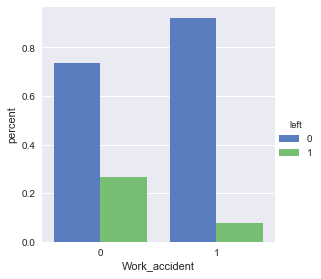

In [19]:
sn.factorplot(x="Work_accident", y = 'percent', hue="left", data=work_accident_percent,
               size=4, kind="bar", palette="muted")

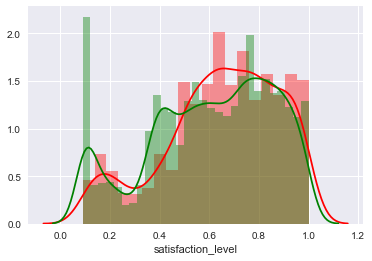

In [20]:
#3. How work accidents have impacted the statisfactin level of the empolyees?
sn.distplot( hr_df[hr_df.Work_accident == 1]['satisfaction_level'], color = 'r')
sn.distplot( hr_df[hr_df.Work_accident == 0]['satisfaction_level'], color = 'g')

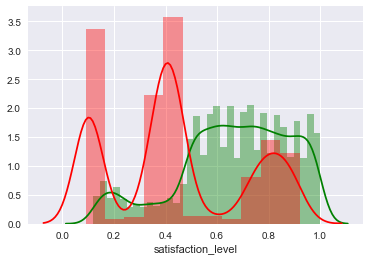

In [21]:
#4. How satisfaction levels influence whether to stay or leave the company?
sn.distplot( hr_df[hr_df.left == 0]['satisfaction_level'], color = 'g')
sn.distplot( hr_df[hr_df.left == 1]['satisfaction_level'], color = 'r')

It can be noted, large number of people who had lower satisfaction levels, have left the company. 
Especially, people who have satisfaction level less than 0.5. This makes sense. But there is also a surge in 
at higher level of satisfaction. Need to understand and deal with these employees with a different stategy.

In [22]:
#5. Average satisfaction levels for people who leave and stay back in the company
sl_left_mean = np.mean( hr_df[hr_df.left == 0]['satisfaction_level'] )
sl_left_mean

0.666809590479516

In [23]:
np.std( hr_df[hr_df.left == 0]['satisfaction_level'] )

0.21709425554771716

In [24]:
np.mean( hr_df[hr_df.left == 1]['satisfaction_level'] )

0.44009801176140917

In [25]:
np.std( hr_df[hr_df.left == 1]['satisfaction_level'] )

0.2638964784854295

### Hypothesis Test: Does lower satisfaction levels lead to people leaving the company
H0 : Average satisfaction level of people leaving is same as average satisfaction of people staying <br>
H1 : Average satisfaction level of people leaving is less than as average satisfaction of people staying   

In [26]:
from scipy import stats

stats.ttest_ind( hr_df[hr_df.left == 1]['satisfaction_level'], hr_df[hr_df.left == 0]['satisfaction_level'])

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

The test establishes that the average satisfaction levels are different.

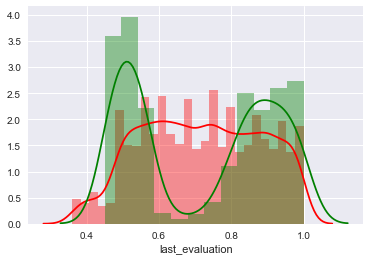

In [27]:
# 6. How last evaluation scores influencing whether to stay or leave the company?
sn.distplot( hr_df[hr_df.left == 0]['last_evaluation'], color = 'r')
sn.distplot( hr_df[hr_df.left == 1]['last_evaluation'], color = 'g')

People with low evaluation and very high evaluation are leaving, where as people with average evaluation scores are staying back. That seems interesting.

In [28]:
# 7. How time spent in company influences attrition?
time_spend_count = hr_df[['time_spend_company', 'left']].groupby(['time_spend_company', 'left']).size()
time_spend_percent = time_spend_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
time_spend_percent.columns = ['time_spend_company', 'left', 'percent']

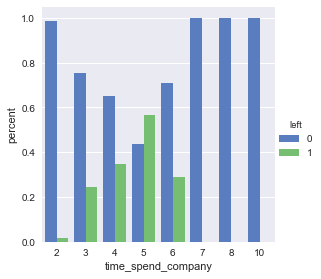

In [29]:
sn.factorplot(x="time_spend_company", y = 'percent', hue="left", data=time_spend_percent,
               size=4, kind="bar", palette="muted")

People who have spent 2 years are not leaving the company. But as experience grows people start leaving and highest after they spend 5 years in the company. But once they cross the golden years '7', they are not leaving.

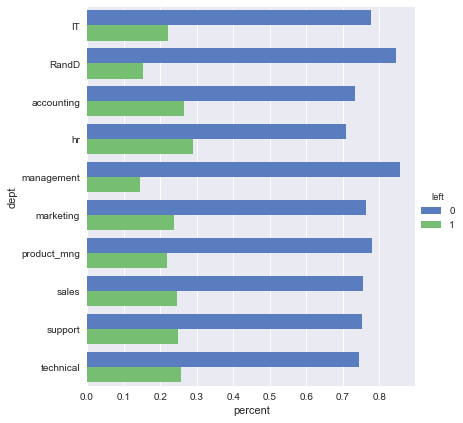

In [30]:
# 8. Which department has maximum attrition?

dept_count = hr_df[['department', 'left']].groupby(['department', 'left']).size()
dept_count_percent = dept_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
dept_count_percent.columns = ['dept', 'left', 'percent']
sn.factorplot(y="dept",
            x = 'percent',
            hue="left",
            data = dept_count_percent,
            size=6,
            kind="bar",
            palette="muted")

The percentage of people leaving the company is evenly distributed across all depts. Surprisingly, the percentage is high in HR itself. Lowest in management.

In [31]:
# 9. Effect of whether someone got promoted in last 5 years?
pd.crosstab( hr_df.promotion_last_5years, hr_df.left )

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


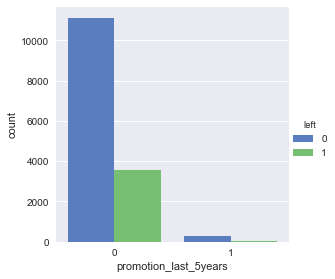

In [32]:
sn.factorplot(x="promotion_last_5years", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

Very few people who got promoted in last 5 years left the company, compared to people who are not promoted in last 5 years

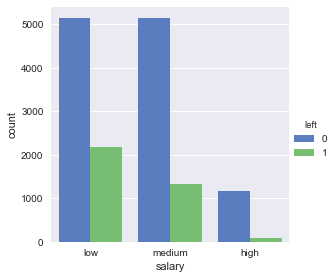

In [33]:
#10.  How Salary is influencing attrition decisions?
sn.factorplot(x="salary", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

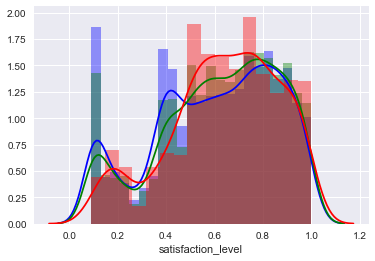

In [34]:
#11. Does higher salary lead to higher satisfaction level?
sn.distplot( hr_df[hr_df.salary == 'low']['satisfaction_level'], color = 'b')
sn.distplot( hr_df[hr_df.salary == 'medium']['satisfaction_level'], color = 'g')
sn.distplot( hr_df[hr_df.salary == 'high']['satisfaction_level'], color = 'r')

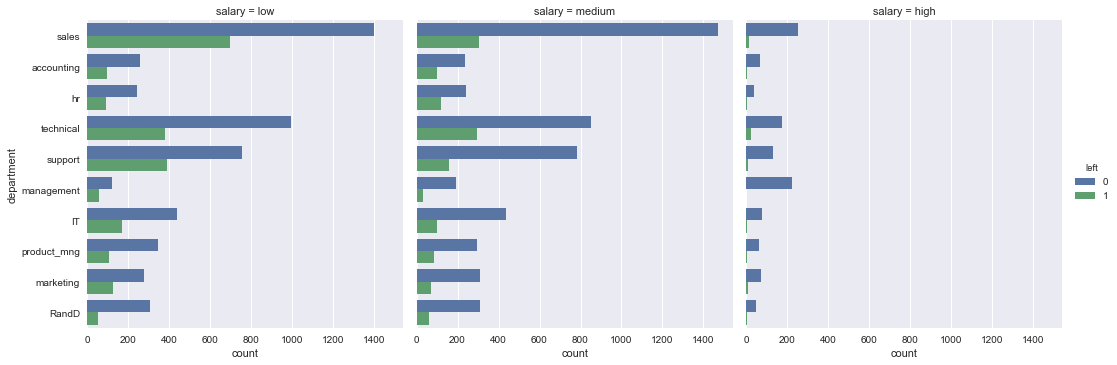

In [35]:
#12.How salaries across departments are related to attrition?
sn.factorplot( y = "department",
            col="salary",
            hue = "left",
            data=hr_df,
            kind="count",
            size=5)

No surprises. People with lowers salary have maximum percentage of exodus, while people with higher salary the exodus is least.

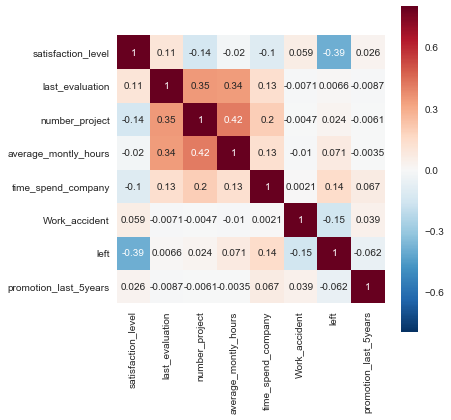

In [36]:
# 13. Lets check corrleation between Variables
corrmat = hr_df.corr()
f, ax = plt.pyplot.subplots(figsize=(6, 6))
sn.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.pyplot.show()

# Some key observations:
Satisfaction level reduces as people spend more time in the company. Also, interestingly when they work on more number of projects. <br>
Evaluation score is positively correlated with spending more montly hours and number of projects. <br>
As satisfaction level reduces, people tend to leave company <br>

### PREDICTIVE MODEL: Build a model to predict if an employee will leave the company

In [21]:
hr_df.columns

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'department', u'salary'],
      dtype='object')

In [55]:
hr_df.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
6                    0.10             0.77               6   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
11                   0.11             0.81               6   
12                   0.84             0.92               4   
13                   0.41             0.55               2   
14                   0.36             

In [3]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company']

categorical_features = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [4]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [5]:
for c_feature in categorical_features:
  hr_df = create_dummies( hr_df, c_feature )

In [19]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [6]:
#Splitting the data

feature_columns = hr_df.columns.difference( ['left'] )
feature_columns1 = feature_columns[1:5]

In [57]:
feature_columns1

Index([u'average_montly_hours', u'department', u'last_evaluation',
       u'number_project'],
      dtype='object')

In [7]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns],
                                                  hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Work_accident_1', -1.4926622659264606),
 ('average_montly_hours', 0.0049756306487029637),
 ('department_RandD', -0.57076362572504025),
 ('department_accounting', 0.093003010335066735),
 ('department_hr', 0.35887704320325536),
 ('department_management', -0.36238814510653666),
 ('department_marketing', 0.13047430429744139),
 ('department_product_mng', 0.023809160127111092),
 ('department_sales', 0.075841800523843247),
 ('department_support', 0.13493942577306295),
 ('department_technical', 0.19545537758819428),
 ('last_evaluation', 0.59258573746066556),
 ('number_project', -0.30373340935550674),
 ('promotion_last_5years_1', -1.2172793589365365),
 ('salary_low', 1.8131725510337624),
 ('salary_medium', 1.3088618866113126),
 ('satisfaction_level', -4.1082675418736914),
 ('time_spend_company', 0.26529852861389602)]

In [11]:
logreg.intercept_

array([-1.53003327])

In [12]:
#Predicting the test cases
hr_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [13]:

hr_test_pred = hr_test_pred.reset_index()

In [14]:
#Comparing the predictions with actual test data
hr_test_pred.sample( n = 10 )

,index,actual,predicted
868,4035,0,0
1951,5871,0,0
765,7865,0,0
2941,7120,0,1
1782,10237,0,0
1558,3717,0,0
1389,6345,0,0
1847,3852,0,0
1020,9123,0,0
1921,9450,0,0


In [15]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted, [1,0] )
cm

array([[ 225,  481],
       [ 175, 2119]])

In [16]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

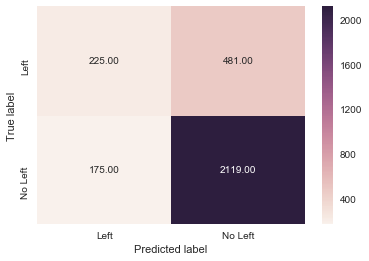

In [17]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [18]:
score = metrics.accuracy_score( hr_test_pred.actual, hr_test_pred.predicted )
round( float(score), 2 )

0.78

Overall test accuracy is 78%. But it is not a good measure. The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left. <br>
The objective of the model is to indentify the people who will leave, so that the company can intervene and act.<br>
This might be the case as the default model assumes people with more than 0.5 probability will not leave the company

In [19]:
# Predit Probability
print test_X[:1]
print logreg.predict_proba( test_X[:1] )

      Work_accident_1  average_montly_hours  department_RandD  \
6723                1                   226                 0   

      department_accounting  department_hr  department_management  \
6723                      0              0                      0   

      department_marketing  department_product_mng  department_sales  \
6723                     1                       0                 0   

      department_support  department_technical  last_evaluation  \
6723                   0                     0             0.96   

      number_project  promotion_last_5years_1  salary_low  salary_medium  \
6723               5                        0           0              1   

      satisfaction_level  time_spend_company  
6723                0.65                   2  
[[ 0.97203474  0.02796526]]


The model is predicting the probability of him leaving the company is only 0.027, which is very low.

In [34]:
#How good the model is?
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.972035,0.027965
1,0.917792,0.082208
2,0.770442,0.229558
3,0.523038,0.476962
4,0.975843,0.024157


In [35]:
hr_test_pred = pd.concat( [hr_test_pred, predict_proba_df], axis = 1 )

In [36]:
hr_test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [37]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
round( float( auc_score ), 2 )

0.81

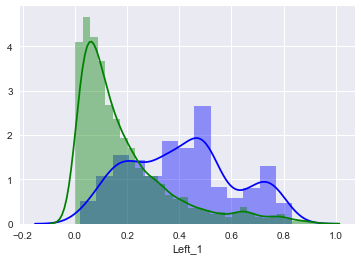

In [38]:
sn.distplot( hr_test_pred[hr_test_pred.actual == 1]["Left_1"], color = 'b' )
sn.distplot( hr_test_pred[hr_test_pred.actual == 0]["Left_1"], color = 'g' )

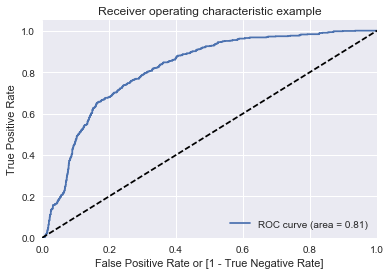

In [39]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( hr_test_pred.actual,
                                     hr_test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [40]:
print thresholds[0:10]
print fpr[0:10]
print tpr[0:10]

[ 1.91905401  0.91905401  0.90057484  0.88605895  0.88001362  0.87933851
  0.872333    0.86974563  0.86193267  0.85880292]
[ 0.          0.00087184  0.00130776  0.00174368  0.0021796   0.00261552
  0.00305144  0.00348736  0.00392328  0.0043592 ]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [41]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]

In [42]:
round( float( cutoff_prob ), 2 )

0.28

In [43]:
#Predicting with new cut-off probability
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 0.28 else 0 )

In [44]:
hr_test_pred[0:10]

,index,actual,predicted,Left_0,Left_1,new_labels
0,6723,0,0,0.972035,0.027965,0
1,6473,0,0,0.917792,0.082208,0
2,4679,0,0,0.770442,0.229558,0
3,862,1,0,0.523038,0.476962,1
4,7286,0,0,0.975843,0.024157,0
5,8127,0,0,0.722851,0.277149,0
6,3017,0,0,0.985596,0.014404,0
7,3087,0,1,0.130254,0.869746,1
8,6425,0,0,0.769714,0.230286,0
9,2250,0,1,0.398617,0.601383,1


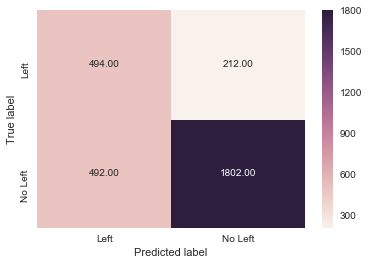

In [45]:

cm = metrics.confusion_matrix( hr_test_pred.actual,
                          hr_test_pred.new_labels, [1,0] )
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Building Decision Tree Model

In [20]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [45]:
param_grid = {'max_depth': np.arange(3, 15)}

In [46]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
tree.fit( train_X, train_y )

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [47]:
tree.best_params_

{'max_depth': 11}

In [48]:
tree.best_score_

0.980498374864572

### Building Final Decision Tree Model

In [25]:
train_X.head(100)

,Work_accident_1,average_montly_hours,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,last_evaluation,number_project,promotion_last_5years_1,salary_low,salary_medium,satisfaction_level,time_spend_company
9838,0,188,0,0,0,0,0,1,0,0,0,0.61,3,0,1,0,1.00,4
7689,0,196,0,0,0,0,0,0,0,0,1,0.78,4,0,0,0,0.16,5
6557,0,175,1,0,0,0,0,0,0,0,0,0.80,3,0,0,1,0.80,2
6872,0,112,0,1,0,0,0,0,0,0,0,0.86,4,0,0,1,0.66,6
820,0,284,0,0,0,0,0,0,0,0,1,0.93,7,0,1,0,0.11,4
1643,0,295,0,0,0,0,0,0,0,0,1,0.83,6,0,1,0,0.09,5
7217,1,155,0,0,0,0,0,0,0,0,1,0.48,3,0,0,1,0.41,2
8351,1,168,0,1,0,0,0,0,0,0,0,0.76,5,0,0,0,0.60,2
2631,1,165,0,0,0,0,0,0,0,0,1,0.49,4,0,1,0,0.31,3
107,0,148,0,1,0,0,0,0,0,0,0,0.50,2,0,0,1,0.44,3


In [49]:
clf_tree = DecisionTreeClassifier( max_depth = 11 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [50]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [51]:
tree_test_pred.sample( n = 10 )

,actual,predicted
9498,0,0
14816,1,1
7822,0,0
9734,0,1
8225,0,0
2477,0,0
12203,1,1
6463,0,0
1632,1,1
1911,1,1


In [52]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.97499999999999998

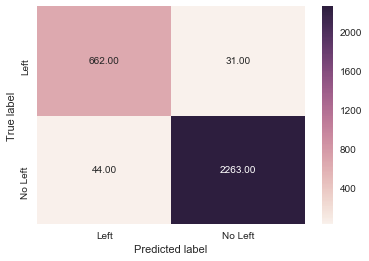

In [53]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Generate Rules from Decision Trees

#### To create a decision tree visualization graph.
- Install GraphViz (As per the OS and version you are using)
- pip install pydotplus
- Add the path to environmental variables
- Note: The notebook needs a restart.

In [54]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [55]:
export_graphviz( clf_tree,
              out_file = "hr_tree.odt",
              feature_names = train_X.columns )

In [56]:
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'hr_tree.odt' )

In [57]:
chd_tree_graph.write_jpg( 'hr_tree.jpg' )

True

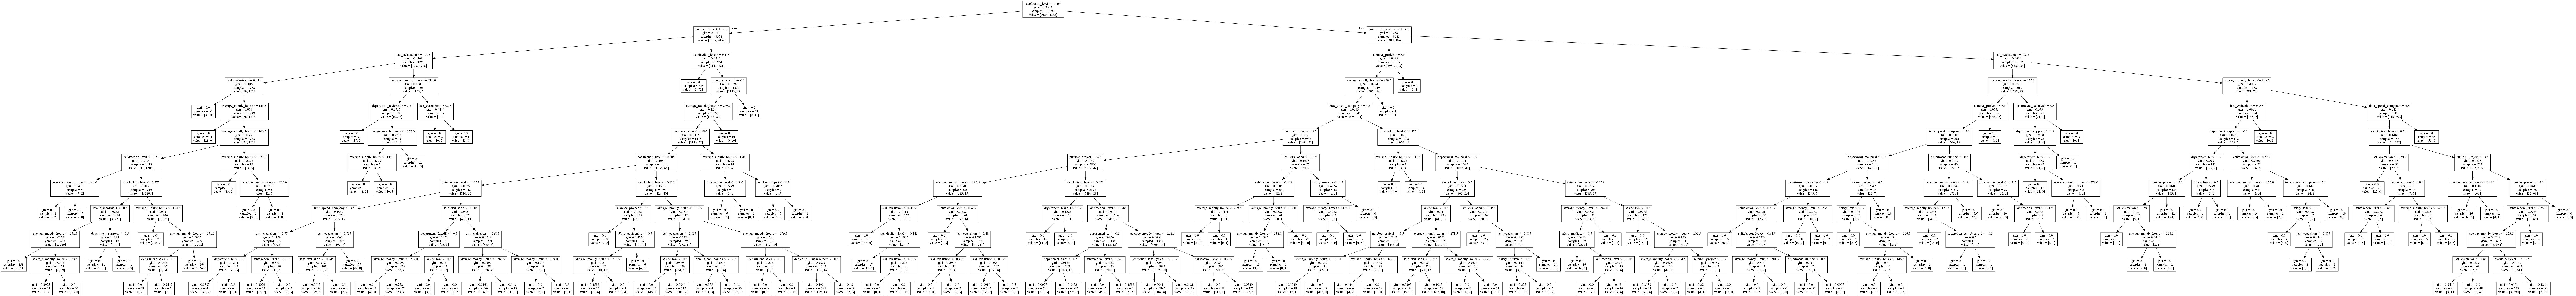

In [58]:
from IPython.display import Image
Image(filename='hr_tree.jpg')

---
# Model $Ensembles$


> Ensemble methods combine multiple classifiers (using _model averaging_ or _voting_) which may differ in algorithms, input features, or input samples. Statistical analyses showed that ensemble methods yield better classification performances and are also less prone to overfitting. Different methods, e.g., bagging or boosting, are used to construct the final classification decision based on weighted votes.

## What is ensembling?

**Ensemble learning (or "ensembling")** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model.

- **Regression:** take the average of the predictions
- **Classification:** take a vote and use the most common prediction, or take the average of the predicted probabilities

For ensembling to work well, the models must have the following characteristics:

- **Accurate:** they outperform the null model
- **Independent:** their predictions are generated using different processes

**The big idea:** If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when averaging the models.

There are two basic **methods for ensembling:**

- Manually ensemble your individual models
- Use a model that ensembles for you

---
Why are we learning about ensembling?

- Very popular method for improving the predictive performance of machine learning models

- Provides a foundation for understanding more sophisticated models

---
# Manual ensembling

What makes a good manual ensemble?

- Different types of **models**
    - Ex. Build an SVC, Decision Tree and a kNN
- Different combinations of **features**
    - Ex. Take a random selection of 5 variables for each model
- Different **tuning parameters**
    - Ex. From the grid search take the top 5 or ten best performing models 

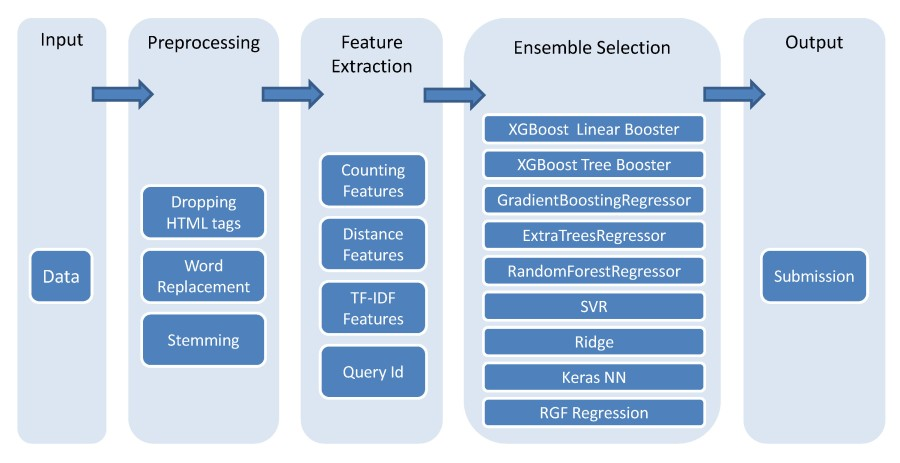

In [38]:
from IPython.display import Image
Image(filename='crowdflower_ensembling.jpg')

## Comparing manual ensembling with a single model approach

**Advantages of manual ensembling:**

- Increases predictive accuracy
- Easy to get started

**Disadvantages of manual ensembling:**

- Decreases interpretability
- Takes longer to train
- Takes longer to predict
- More complex to automate and maintain
- Small gains in accuracy may not be worth the added complexity

<big>

---

- Decision Trees are a 
    - LOW BIAS (not prone to underfitting), 
    - HIGH VARIANCE (prone to overfitting) algorithm


- ENSEMBLES are a variance reduction technique

- ENSEMBLES OF DECISION TREES create LOW BIAS, LOW VARIANCE model.

---

# Bagging

The primary weakness of **decision trees** is that they don't tend to have the best predictive accuracy. This is partially due to **high variance**, meaning that different splits in the training data can lead to very different trees.

**Bagging** is a general purpose procedure for reducing the variance of a machine learning method, but is particularly useful for decision trees. Bagging is short for **bootstrap aggregation**, meaning the aggregation of bootstrap samples.

What is a **bootstrap sample**? A random sample with replacement:

---
**How does bagging work (for decision trees)?**

1. Grow B trees using B bootstrap samples from the training data.
2. Train each tree on its bootstrap sample and make predictions.
3. Combine the predictions:
    - Average the predictions for **regression trees**
    - Take a vote for **classification trees**

Notes:

- **Each bootstrap sample** should be the same size as the original training set.
- **B** should be a large enough value that the error seems to have "stabilized".
- The trees are **grown deep** so that they have low bias/high variance.

Bagging increases predictive accuracy by **reducing the variance**, similar to how cross-validation reduces the variance associated with train/test split (for estimating out-of-sample error) by splitting many times an averaging the results.

### Bagged decision trees (with B=10)

In [59]:
from sklearn.ensemble import BaggingClassifier

In [60]:
import sklearn.ensemble as en

In [61]:
dir(en)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'VotingClassifier',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '_gradient_boosting',
 'bagging',
 'base',
 'forest',
 'gradient_boosting',
 'iforest',
 'partial_dependence',
 'voting_classifier',
 'weight_boosting']

In [62]:
BaggingClassifier?

In [63]:
bagclm = BaggingClassifier(oob_score=True, n_estimators=100)
bagclm.fit(train_X, train_y)

y_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': bagclm.predict( test_X) } )

In [64]:
bagclm.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0

In [65]:
metrics.accuracy_score( y_pred.actual, y_pred.predicted )

0.98733333333333329

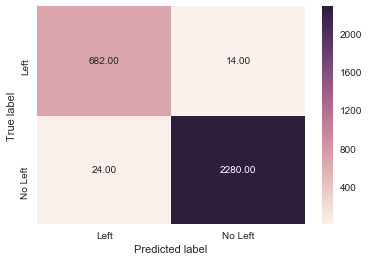

In [66]:
tree_bg = metrics.confusion_matrix( y_pred.predicted,
                                 y_pred.actual,
                                 [1,0] )
sn.heatmap(tree_bg, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

----
## Estimating out-of-sample error

For bagged models, out-of-sample error can be estimated without using **train/test split** or **cross-validation**!

On average, each bagged tree uses about **two-thirds** of the observations. For each tree, the **remaining observations** are called "out-of-bag" observations.

How to calculate **"out-of-bag error":**

1. For every observation in the training data, predict its response value using **only** the trees in which that observation was out-of-bag. Average those predictions (for regression) or take a vote (for classification).
2. Compare all predictions to the actual response values in order to compute the out-of-bag error.

When B is sufficiently large, the **out-of-bag error** is an accurate estimate of **out-of-sample error**.

In [67]:
# compute the out-of-bag accuracy for B=500
bagclm.oob_score_

0.99016584715392952

## Estimating feature importance

Bagging increases **predictive accuracy**, but decreases **model interpretability** because it's no longer possible to visualize the tree to understand the importance of each feature.

However, we can still obtain an overall summary of **feature importance** from bagged models:

- **Bagged regression trees:** calculate the total amount that **MSE** is decreased due to splits over a given feature, averaged over all trees
- **Bagged classification trees:** calculate the total amount that **Gini index** is decreased due to splits over a given feature, averaged over all trees

# BUILDING RANDOM FOREST MODEL

Random Forests is a **slight variation of bagged trees** that has even better performance:

- Exactly like bagging, we create an ensemble of decision trees using bootstrapped samples of the training set.
- However, when building each tree, each time a split is considered, a **random sample of m features** is chosen as split candidates from the **full set of p features**. The split is only allowed to use **one of those m features**.
    - A new random sample of features is chosen for **every single tree at every single split**.
    - For **classification**, m is typically chosen to be the square root of p.
    - For **regression**, m is typically chosen to be somewhere between p/3 and p.

What's the point?

- Suppose there is **one very strong feature** in the data set. When using bagged trees, most of the trees will use that feature as the top split, resulting in an ensemble of similar trees that are **highly correlated**.
- Averaging highly correlated quantities does not significantly reduce variance (which is the entire goal of bagging).
- By randomly leaving out candidate features from each split, **Random Forests "decorrelates" the trees**, such that the averaging process can reduce the variance of the resulting model.

### Tuning n_estimators

One important tuning parameter is **n_estimators**, which is the number of trees that should be grown. It should be a large enough value that the error seems to have "stabilized".

### Tuning max_features

The other important tuning parameter is **max_features**, which is the number of features that should be considered at each split.

## Comparing Random Forests with decision trees

**Advantages of Random Forests:**

- Performance is competitive with the best supervised learning methods
- Provides a more reliable estimate of feature importance
- Allows you to estimate out-of-sample error without using train/test split or cross-validation

**Disadvantages of Random Forests:**

- Less interpretable
- Slower to train
- Slower to predict

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
RandomForestClassifier?

In [69]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 )
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [70]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [71]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.98899999999999999

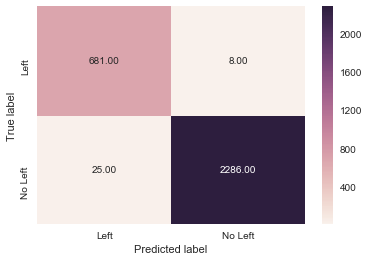

In [72]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Feature importance from the Random Forest Model

In [73]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

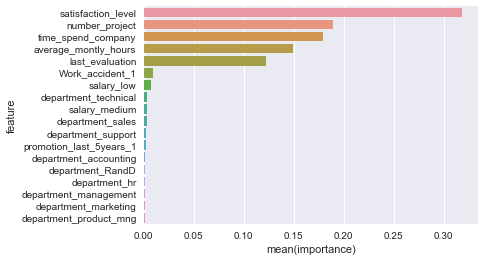

In [74]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

<b> Note: </b>
As per the model, the most important features which influence whether to leave the company,in descending order, are

- satisfaction_level
- number_project
- time_spend_company
- last_evaluation
- average_montly_hours
- work_accident

### Boosting

#### Ada Boosting

In [76]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [77]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [78]:
from sklearn.grid_search import GridSearchCV
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [79]:
gscv_ada.fit(train_X, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [90]:
gscv_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 800}

In [91]:
clf_ada = gscv_ada.best_estimator_

In [80]:
gscv_ada.best_score_

0.9604967080590049

In [81]:
ad<-AdaBoostClassifier()
ad.fit(train_X, train_y, learning_rate =0.1, n_estimators=800)

NameError: name 'ad' is not defined

In [93]:
from sklearn.cross_validation import cross_val_score

In [96]:
print pd.Series(cross_val_score(clf_ada, 
                             train_X, train_y, cv=10)).describe()[['min', 'mean', 'max']]

print pd.Series(cross_val_score(clf_ada, 
                             test_X, test_y, cv=10)).describe()[['min', 'mean', 'max']]

min     0.951626
mean    0.960579
max     0.970025
dtype: float64
min     0.940199
mean    0.959004
max     0.973333
dtype: float64


In [ ]:
Series(cross_val_score(clf_ada, X_te, y_te, cv=10))

### Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn
from sklearn.grid_search import GridSearchCV

In [38]:
GaussianNB?

In [39]:
nb_clf = GaussianNB()
nb_clf.fit(train_X,train_y)

GaussianNB(priors=None)

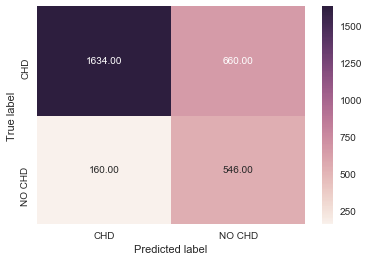

In [41]:
nb_cm = metrics.confusion_matrix( test_y,nb_clf.predict( test_X ) )
sn.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["CHD", "NO CHD"] , yticklabels = ["CHD", "NO CHD"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [42]:
metrics.accuracy_score( test_y, nb_clf.predict( test_X ) )

0.72666666666666668

#### KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn
from sklearn.grid_search import GridSearchCV

In [28]:
from sklearn.grid_search import GridSearchCV

C:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [9]:
KNeighborsClassifier?

In [29]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [30]:
knn_clf.fit(train_X, train_y )

knn_clf.best_score_

0.9382448537378115

In [31]:
knn_clf.best_params_

{'n_neighbors': 9}

### Building for the n_neighbors=9

In [32]:
knn_clf = KNeighborsClassifier( n_neighbors =9 )

In [33]:
knn_clf.fit( train_X, train_y )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [34]:
knn_cm = metrics.confusion_matrix( test_y, knn_clf.predict( test_X ) )


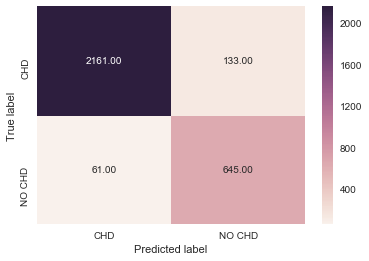

In [35]:
sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["CHD", "NO CHD"] , yticklabels = ["CHD", "NO CHD"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [36]:
metrics.accuracy_score( test_y, knn_clf.predict( test_X ) )

0.93533333333333335

### SVM

In [1]:
# Linear SVM
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
SVC?

In [9]:
svc = SVC( C = 1.0, kernel = "linear" )

In [10]:
svc.fit( train_X, train_y )

KeyboardInterrupt: 

In [ ]:
svc_predict = svc.predict( test_X )

In [ ]:
l_svm_cm = metrics.confusion_matrix( test_y, svc_predict )

In [ ]:
sn.heatmap(l_svm_cm, annot=True,  fmt='.2f', xticklabels = ["CHD", "NO CHD"] , yticklabels = ["CHD", "NO CHD"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
import sklearn.svm 

In [ ]:
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(C=1),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

clf.fit(train_X, train_y )

In [ ]:
clf

In [ ]:
clf.fit(train_X, train_y )
clf.best_params_
clf.best_score_

In [ ]:
clf.best_score_

In [ ]:
l_svm_cm = metrics.confusion_matrix( test_y, clf.predict( test_X ) )

In [ ]:
sn.heatmap(l_svm_cm, annot=True,  fmt='.2f', xticklabels = ["CHD", "NO CHD"] , yticklabels = ["CHD", "NO CHD"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

### KERNAL SVM

In [11]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

In [12]:
clf = GridSearchCV(SVC(C=1),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

clf.fit(train_X, train_y )

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [13]:
clf.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
clf.best_score_

In [18]:
clf=SVC(kernel='rbf', gamma=0.001, C=1000)

In [22]:
from sklearn import metrics

In [19]:
clf.fit(train_X, train_y )

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
k_svm_cm = metrics.confusion_matrix( test_y, clf.predict( test_X ) )

In [25]:
k_svm_cm

array([[2219,   75],
       [  67,  639]])

In [24]:
sn.heatmap(k_svm_cm, annot=True,  fmt='.2f', xticklabels = ["Left", "NO Left"] , yticklabels = ["Left", "No left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

NameError: name 'sn' is not defined

In [ ]:
for k in ['poly','linear','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(train_X, train_y)
    accuracy = clf.score(test_X, test_y)
    print(k, accuracy)